# Is there a link between certain Covid-19 vaccines and 2023 excess all-cause mortality? 

 To remember:

 - are we using excess death or excess mortality - keep constant throughout
 - make plot function
 - rename variables
 - comments on lines of code 

### Introduction 

This project aims to investigate excess all cause mortality across EU countries post-covid-19 pandemic, and the role of Covid-19 vaccines as a potential cause. 

The raw number of excess deaths gives us a sense of scale, but it is less comparable across countries due to large differences in population. To better enable comparisons across countries, we measure excess mortality as the percentage difference between the reported and projected number of deaths.

The concept of excess mortality refers to the difference between the number of observed and expected deaths (CITE). All-cause excess mortality therefore refers to the difference in the number of people who died from any cause in a given period, compared to the expected number of deaths from any cause in that given period.

We will use multiple linear regression to investigate the relationship between (how many) EU country's vaccination and their excess death.

The EU scope of our project comes from a wealth of data making it possible to compare vaccination types etc


### Literature review

- mention UK parliment speech to introduce the focus on vaccination as a potential cause? a single thing which affected the whole population etc
- evidence for withdrawal of mrna vaccines and therefore we will split by vaccine type
- what has relevant existing literature done/found and what are the gaps - therefore what are we trying to find/do

### Excess death data 

- How do Eurostat define an excess death - what historical baseline is used 
- Where does the data come from - how is it inputted
- The excess mortality indicator takes the number of people who died from any cause in a given period and compares it with a historical baseline from previous years in a period that was not affected by the COVID-19 pandemic. In this case, the baseline consists of the average number of deaths that occurred each month during the period 2016-2019.
- mention limitations of this measure & 2016-2019 baseline
- acknowledge the fact that we haven't been able to determine the variance of excess mortality prior to/during 2016-2019

### Vaccine data




### Analysis

##### Inital regression of mean excess mortality against vaccination percentage for EU countries

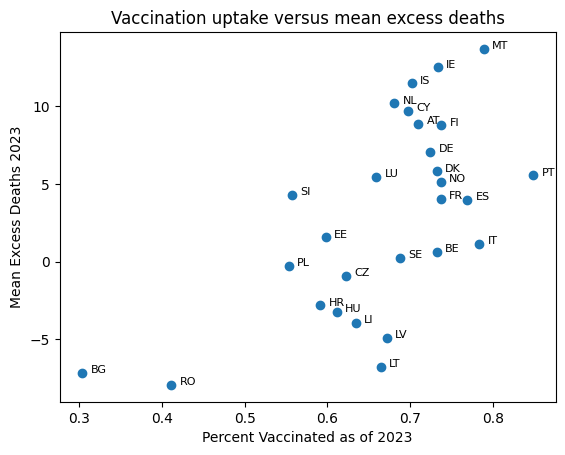

In [11]:
import matplotlib.pyplot as plt

import first_regression
plt.scatter(first_regression.merged[0],first_regression.merged['Mean 2023'])
 
for i in range(len(first_regression.merged)):
    plt.text(first_regression.merged[0][i] + 0.01, first_regression.merged['Mean 2023'][i], first_regression.merged['ReportingCountry'][i], fontsize=8)
 
plt.xlabel('Percent Vaccinated as of 2023')
plt.ylabel('Mean Excess Deaths 2023')
plt.title('Vaccination uptake versus mean excess deaths')
 
plt.show()

In [18]:
first_regression.regression.rvalue

0.6312428426108756

In [17]:
first_regression.regression.pvalue

0.0003158098368101435

This initial linear regression plot yeilded an correlation coefficient of 0.63, indicating a moderate postitive correlation between mean 2023 excess all-cause mortality and vaccination percentage. A positive correlation suggests that the higher a country's proportion of vaccinated individuals, the higher their levels of excess all-cause mortality (dk how best to say this).

A very small p-value of 0.0003 enables us to have high confidence that the observed correlation did not arise from our null-model of no correlation, and therefore we have reason to prefer to the alternative hypothesis, that higher vaccination percentage is associated with higher excess mortlaity. In other words, the result is unlikley to have happened by chance when there is no correlation, and therefore we can be relatively confident in the (validity?) of our results.

- Comment on any anomalies
- Add a line of best fit
- Plot the distrbution of the residual errors to investigate whether the relationship is best represented by a straight line

##### Assumptions/limitations

- Using vaccination percentage up to 2023 then mean deaths since start of 2023
- Mean death across 2023 could flatten the seasonality of excess death?
- Just focusing on first doses
- Not done by vaccination type....
- We know it is correlated but the question is whether vaccination rate impacted excess death

### Further interrogation of the results

### Conclusion

- Areas for future research 